In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
</style>
"""))

<font size=6>딥러닝 기초 mnist(손글씨기초)</font>

In [2]:
from tensorflow.keras.datasets import mnist #dataset
import tensorflow.keras.utils as utils #one hot encoding
from tensorflow.keras.models import Sequential #모델 객체 생성시생성시
from tensorflow.keras.layers import Dense, Activation #layer 생성시
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(3)

In [3]:
#1. dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

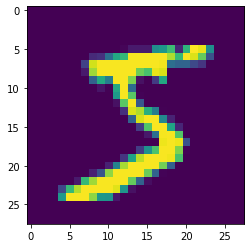

In [5]:
plt.imshow(X_train[0])

In [6]:
# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [7]:
#훈련셋 - model 학습
X_train.shape, Y_train.shape

((50000, 28, 28), (50000,))

In [8]:
#검증셋 - model 학습
X_val.shape, Y_val.shape

((10000, 28, 28), (10000,))

In [9]:
#평가셋 - model 평가
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [10]:
#normalize를 위해 색상값으로 나눔 (1차원으로 변형)
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0

In [11]:
# 훈련셋과 검증셋 700, 300개씩 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [12]:
#라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
Y_train.shape, Y_val.shape, Y_test.shape

((700, 10), (300, 10), (10000, 10))

In [13]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(2, input_dim=784, activation="relu"))#입력 784
model.add(Dense(10, activation="softmax"))#출력 10 > deep learning

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

#4. 힉습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data = (X_val, Y_val))

Epoch 1/1000
70/70 [==============================] - 2s 20ms/step - loss: 2.3104 - accuracy: 0.1068 - val_loss: 2.2527 - val_accuracy: 0.1033
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2545 - accuracy: 0.1127 - val_loss: 2.1886 - val_accuracy: 0.1167
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1881 - accuracy: 0.1329 - val_loss: 2.1146 - val_accuracy: 0.1167
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1127 - accuracy: 0.1546 - val_loss: 2.0378 - val_accuracy: 0.1967
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0424 - accuracy: 0.2271 - val_loss: 1.9755 - val_accuracy: 0.2433
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9642 - accuracy: 0.2395 - val_loss: 1.9231 - val_accuracy: 0.2467
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9208 - accuracy: 0.2607 - val_loss: 1.8742 - val_accuracy: 0.2733
Epoch

70/70 [==============================] - 0s 1ms/step - loss: 0.9984 - accuracy: 0.6414 - val_loss: 1.2939 - val_accuracy: 0.5233
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9978 - accuracy: 0.6050 - val_loss: 1.2810 - val_accuracy: 0.5367
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0218 - accuracy: 0.6155 - val_loss: 1.3029 - val_accuracy: 0.5100
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9785 - accuracy: 0.6598 - val_loss: 1.2999 - val_accuracy: 0.5367
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0208 - accuracy: 0.6162 - val_loss: 1.3063 - val_accuracy: 0.5267
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0026 - accuracy: 0.6313 - val_loss: 1.2875 - val_accuracy: 0.5267
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0131 - accuracy: 0.6467 - val_loss: 1.2979 - val_accuracy: 0.5167
Epoch 1

Epoch 172/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9066 - accuracy: 0.6674 - val_loss: 1.3139 - val_accuracy: 0.5533
Epoch 173/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9385 - accuracy: 0.6947 - val_loss: 1.3297 - val_accuracy: 0.5433
Epoch 174/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8953 - accuracy: 0.6861 - val_loss: 1.3126 - val_accuracy: 0.5467
Epoch 175/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9140 - accuracy: 0.6549 - val_loss: 1.3280 - val_accuracy: 0.5600
Epoch 176/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9003 - accuracy: 0.6940 - val_loss: 1.3158 - val_accuracy: 0.5467
Epoch 177/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9283 - accuracy: 0.6784 - val_loss: 1.3243 - val_accuracy: 0.5500
Epoch 178/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8893 - accuracy: 0.6827 - val_loss: 1.3066 - val_accuracy:

Epoch 285/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8316 - accuracy: 0.7222 - val_loss: 1.4264 - val_accuracy: 0.5367
Epoch 286/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8138 - accuracy: 0.7194 - val_loss: 1.4142 - val_accuracy: 0.5567
Epoch 287/1000
70/70 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.70 - 0s 1ms/step - loss: 0.8212 - accuracy: 0.7235 - val_loss: 1.4357 - val_accuracy: 0.5633
Epoch 288/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8048 - accuracy: 0.7249 - val_loss: 1.4150 - val_accuracy: 0.5400
Epoch 289/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8049 - accuracy: 0.7190 - val_loss: 1.4334 - val_accuracy: 0.5600
Epoch 290/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8002 - accuracy: 0.7338 - val_loss: 1.4310 - val_accuracy: 0.5433
Epoch 291/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7621 - accuracy:

Epoch 398/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7243 - accuracy: 0.7448 - val_loss: 1.5406 - val_accuracy: 0.5400
Epoch 399/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 0.7640 - val_loss: 1.5181 - val_accuracy: 0.5500
Epoch 400/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7431 - accuracy: 0.7553 - val_loss: 1.5254 - val_accuracy: 0.5533
Epoch 401/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.7660 - val_loss: 1.5228 - val_accuracy: 0.5500
Epoch 402/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.7724 - val_loss: 1.5328 - val_accuracy: 0.5333
Epoch 403/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7287 - accuracy: 0.7302 - val_loss: 1.5248 - val_accuracy: 0.5367
Epoch 404/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7337 - accuracy: 0.7534 - val_loss: 1.5409 - val_accuracy:

Epoch 455/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.7766 - val_loss: 1.5874 - val_accuracy: 0.5333
Epoch 456/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.7717 - val_loss: 1.5853 - val_accuracy: 0.5333
Epoch 457/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.7570 - val_loss: 1.5885 - val_accuracy: 0.5367
Epoch 458/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.8015 - val_loss: 1.5990 - val_accuracy: 0.5267
Epoch 459/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.7716 - val_loss: 1.5922 - val_accuracy: 0.5333
Epoch 460/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.7723 - val_loss: 1.5778 - val_accuracy: 0.5400
Epoch 461/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.7698 - val_loss: 1.6230 - val_accuracy:

Epoch 512/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.7928 - val_loss: 1.6157 - val_accuracy: 0.5333
Epoch 513/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.7829 - val_loss: 1.6266 - val_accuracy: 0.5333
Epoch 514/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.8010 - val_loss: 1.6439 - val_accuracy: 0.5300
Epoch 515/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.7709 - val_loss: 1.6444 - val_accuracy: 0.5367
Epoch 516/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.7865 - val_loss: 1.6279 - val_accuracy: 0.5400
Epoch 517/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.8151 - val_loss: 1.6396 - val_accuracy: 0.5367
Epoch 518/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.7930 - val_loss: 1.6374 - val_accuracy:

Epoch 569/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.7810 - val_loss: 1.6864 - val_accuracy: 0.5300
Epoch 570/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.8039 - val_loss: 1.6655 - val_accuracy: 0.5367
Epoch 571/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.8107 - val_loss: 1.6689 - val_accuracy: 0.5400
Epoch 572/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.8172 - val_loss: 1.6723 - val_accuracy: 0.5367
Epoch 573/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.7852 - val_loss: 1.6750 - val_accuracy: 0.5367
Epoch 574/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5851 - accuracy: 0.8118 - val_loss: 1.6924 - val_accuracy: 0.5400
Epoch 575/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.7785 - val_loss: 1.6988 - val_accuracy:

Epoch 626/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.7952 - val_loss: 1.7120 - val_accuracy: 0.5400
Epoch 627/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.7904 - val_loss: 1.7621 - val_accuracy: 0.5333
Epoch 628/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.8207 - val_loss: 1.7211 - val_accuracy: 0.5433
Epoch 629/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.7924 - val_loss: 1.7101 - val_accuracy: 0.5400
Epoch 630/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.8106 - val_loss: 1.7043 - val_accuracy: 0.5367
Epoch 631/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.7891 - val_loss: 1.7021 - val_accuracy: 0.5300
Epoch 632/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6103 - accuracy: 0.8272 - val_loss: 1.7205 - val_accuracy:

Epoch 739/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.8169 - val_loss: 1.8261 - val_accuracy: 0.5200
Epoch 740/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.8252 - val_loss: 1.8290 - val_accuracy: 0.5333
Epoch 741/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.8205 - val_loss: 1.8220 - val_accuracy: 0.5233
Epoch 742/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.8321 - val_loss: 1.8290 - val_accuracy: 0.5300
Epoch 743/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.8285 - val_loss: 1.8308 - val_accuracy: 0.5233
Epoch 744/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.8173 - val_loss: 1.8308 - val_accuracy: 0.5333
Epoch 745/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.8564 - val_loss: 1.8293 - val_accuracy:

Epoch 796/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.8474 - val_loss: 1.8673 - val_accuracy: 0.5200
Epoch 797/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5575 - accuracy: 0.8398 - val_loss: 1.8804 - val_accuracy: 0.5367
Epoch 798/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5657 - accuracy: 0.8236 - val_loss: 1.9045 - val_accuracy: 0.5333
Epoch 799/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.8268 - val_loss: 1.8976 - val_accuracy: 0.5233
Epoch 800/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.8355 - val_loss: 1.8829 - val_accuracy: 0.5333
Epoch 801/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.8359 - val_loss: 1.8655 - val_accuracy: 0.5233
Epoch 802/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.8164 - val_loss: 1.8957 - val_accuracy:

Epoch 853/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.8653 - val_loss: 1.9351 - val_accuracy: 0.5267
Epoch 854/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.8459 - val_loss: 1.9285 - val_accuracy: 0.5200
Epoch 855/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.8750 - val_loss: 1.9602 - val_accuracy: 0.5200
Epoch 856/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.8587 - val_loss: 1.9254 - val_accuracy: 0.5167
Epoch 857/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.8522 - val_loss: 1.9536 - val_accuracy: 0.5300
Epoch 858/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.8714 - val_loss: 1.9293 - val_accuracy: 0.5200
Epoch 859/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.8422 - val_loss: 1.9339 - val_accuracy:

Epoch 910/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8878 - val_loss: 1.9877 - val_accuracy: 0.5133
Epoch 911/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5726 - accuracy: 0.8424 - val_loss: 1.9954 - val_accuracy: 0.5133
Epoch 912/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.8815 - val_loss: 2.0299 - val_accuracy: 0.5200
Epoch 913/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.8470 - val_loss: 1.9959 - val_accuracy: 0.5133
Epoch 914/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8802 - val_loss: 2.0052 - val_accuracy: 0.5167
Epoch 915/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8842 - val_loss: 1.9922 - val_accuracy: 0.5167
Epoch 916/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.8630 - val_loss: 2.0308 - val_accuracy:

Epoch 967/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8940 - val_loss: 2.0605 - val_accuracy: 0.5100
Epoch 968/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.8681 - val_loss: 2.0828 - val_accuracy: 0.5233
Epoch 969/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.8791 - val_loss: 2.0577 - val_accuracy: 0.5167
Epoch 970/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8738 - val_loss: 2.0610 - val_accuracy: 0.5100
Epoch 971/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8475 - val_loss: 2.0752 - val_accuracy: 0.5133
Epoch 972/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.8835 - val_loss: 2.0584 - val_accuracy: 0.5067
Epoch 973/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.8583 - val_loss: 2.0735 - val_accuracy:

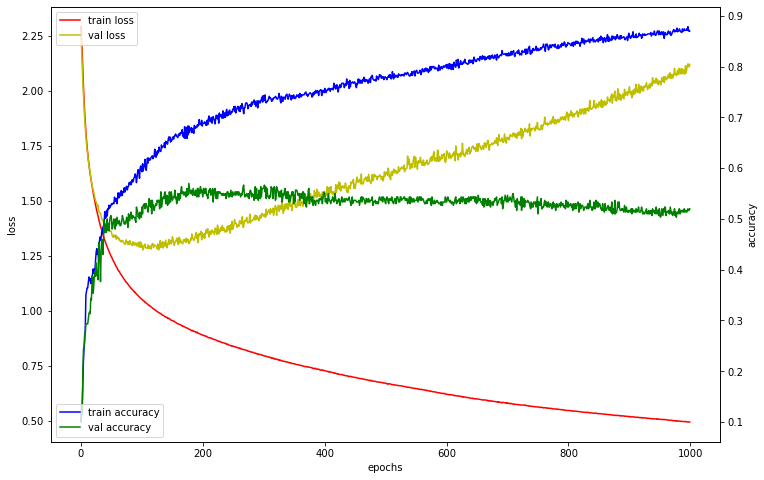

In [14]:
#5. 모델 학습과정을 표시하고 평가
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'r', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'y', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc=2)
acc_ax.legend(loc=3)

#과적합 확인

In [15]:
#모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 0s 921us/step - loss: 2.4145 - accuracy: 0.5004


In [16]:
#loss and accuracy
loss_and_metrics[0], loss_and_metrics[1]

(2.4145264625549316, 0.5004000067710876)

In [17]:
#6. 모델 저장 및 로드
model.save("model/mnist.h5")

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [19]:
#모델 로드
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


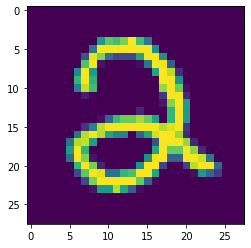

In [20]:
plt.imshow(X_train[5].reshape(28,28))

In [21]:
model2.predict(X_train[5].reshape(1,784)).argmax()

2

In [22]:
print(model2.predict_classes(X_train[5].reshape(1,784)))

[2]


C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
#callback function

In [24]:
import tensorflow as tf
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch % 10 == 0:
            print("epoch: {}, loss: {}, val_loss: {}".format(self.epoch, logs.get('loss'), logs.get('val_loss')))
        self.epoch += 1

#1. 데이터 셋
#훈련셋,  검증셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
#normalize를 위해 색상값으로 나눔 (1차원으로 변형)
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0
# 훈련셋과 검증셋 700, 300개씩 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
#라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
Y_train.shape, Y_val.shape, Y_test.shape

#2. 모델 구성하기
model = Sequential()
model.add(Dense(2, input_dim=784, activation="relu"))#입력 784
model.add(Dense(10, activation="softmax"))#출력 10 > deep learning

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

#4. 힉습시키기
custom_hist = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data = (X_val, Y_val), verbose=0, callbacks=[custom_hist])

epoch: 0, loss: 2.2725398540496826, val_loss: 2.242701292037964
epoch: 10, loss: 1.8553802967071533, val_loss: 1.896582007408142
epoch: 20, loss: 1.6286298036575317, val_loss: 1.694804310798645
epoch: 30, loss: 1.4898489713668823, val_loss: 1.5995835065841675
epoch: 40, loss: 1.390231966972351, val_loss: 1.543249249458313
epoch: 50, loss: 1.3179739713668823, val_loss: 1.5123629570007324
epoch: 60, loss: 1.2562267780303955, val_loss: 1.480188012123108
epoch: 70, loss: 1.2016079425811768, val_loss: 1.457696795463562
epoch: 80, loss: 1.1544502973556519, val_loss: 1.442564845085144
epoch: 90, loss: 1.113982915878296, val_loss: 1.4303584098815918
epoch: 100, loss: 1.0764802694320679, val_loss: 1.416694164276123
epoch: 110, loss: 1.0466800928115845, val_loss: 1.4528241157531738
epoch: 120, loss: 1.0215249061584473, val_loss: 1.4293841123580933
epoch: 130, loss: 0.9953449964523315, val_loss: 1.4332411289215088
epoch: 140, loss: 0.9720988869667053, val_loss: 1.4457203149795532
epoch: 150, loss

In [25]:
# early stopping - val_loss

In [33]:
#1. 데이터 셋
#훈련셋,  검증셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
#normalize를 위해 색상값으로 나눔 (1차원으로 변형)
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0
# 훈련셋과 검증셋 700, 300개씩 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
#라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
Y_train.shape, Y_val.shape, Y_test.shape

#2. 모델 구성하기
model = Sequential()
model.add(Dense(2, input_dim=784, activation="relu"))#입력 784
model.add(Dense(10, activation="softmax"))#출력 10 > deep learning

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

#4. 힉습시키기
from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping() > 성급한 조기 종료
early_stopping = EarlyStopping(patience=20) #인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data = (X_val, Y_val), verbose=1, callbacks=[early_stopping])
#val_loss가 감소하다가 증가하면 정지

Epoch 1/1000
70/70 [==============================] - 1s 3ms/step - loss: 2.3012 - accuracy: 0.0875 - val_loss: 2.2782 - val_accuracy: 0.0800
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2578 - accuracy: 0.0968 - val_loss: 2.2292 - val_accuracy: 0.1333
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1996 - accuracy: 0.1549 - val_loss: 2.1847 - val_accuracy: 0.1500
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1317 - accuracy: 0.1910 - val_loss: 2.1440 - val_accuracy: 0.1600
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0737 - accuracy: 0.1948 - val_loss: 2.1054 - val_accuracy: 0.1633
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0611 - accuracy: 0.1853 - val_loss: 2.0652 - val_accuracy: 0.1667
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9866 - accuracy: 0.2099 - val_loss: 2.0294 - val_accuracy: 0.2167
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 1.0805 - accuracy: 0.6129 - val_loss: 1.4112 - val_accuracy: 0.5333
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0192 - accuracy: 0.6508 - val_loss: 1.4134 - val_accuracy: 0.5100
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0754 - accuracy: 0.6213 - val_loss: 1.4147 - val_accuracy: 0.5167
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0679 - accuracy: 0.6028 - val_loss: 1.4306 - val_accuracy: 0.5067
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9959 - accuracy: 0.6355 - val_loss: 1.4550 - val_accuracy: 0.4800
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0068 - accuracy: 0.6516 - val_loss: 1.4480 - val_accuracy: 0.4800
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0835 - accuracy: 0.6294 - val_loss: 1.4156 - val_accuracy: 0.5167
Epoch 1

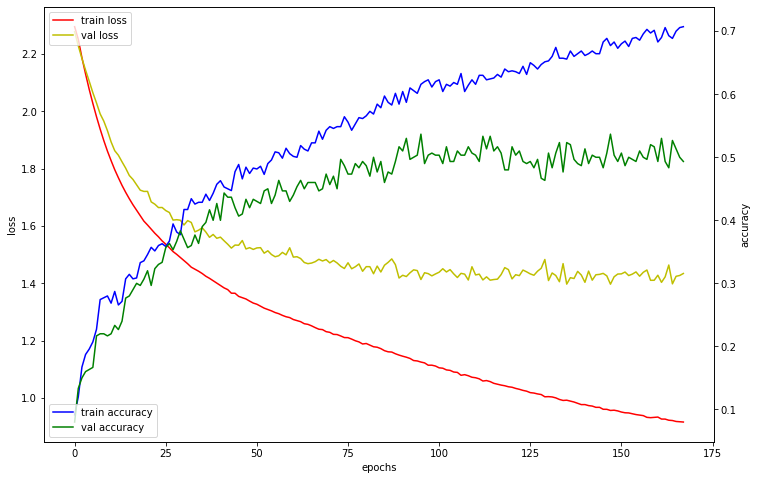

In [34]:
#5. 모델 학습과정을 표시하고 평가
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'r', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'y', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc=2)
acc_ax.legend(loc=3)

In [36]:
#모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
#loss and accuracy
loss_and_metrics[0], loss_and_metrics[1]

313/313 [==============================] - 0s 846us/step - loss: 1.3743 - accuracy: 0.5474


(1.3742711544036865, 0.5473999977111816)

In [58]:
#모델 사용하기
idx = np.random.choice(X_test.shape[0], 5)
xhat = X_test[idx]
yhat = np.argmax(model.predict(xhat), axis=1)
np.argmax(Y_test[idx], axis=1) == yhat

array([ True,  True, False,  True,  True])

In [59]:
#6. 모델 저장 및 로드
model.save("model/mnist.h5")

In [60]:
#모델 로드
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.predict_classes(xhat)

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 4, 8, 0, 0], dtype=int64)

In [61]:
#accuracy 늘리기
#1. 데이터 확보
#2. 레이어
#3. 활성화 함수 > 은닉층: relu, elu / 출력층: sigmoid, softmax
#4. optimizer, epoch

In [90]:
#1. 데이터 셋
#훈련셋,  검증셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
#normalize를 위해 색상값으로 나눔 (1차원으로 변형)
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val = X_val.reshape(10000,784).astype('float32') / 255.0
X_test = X_test.reshape(10000,784).astype('float32') / 255.0
# 훈련셋과 검증셋 700, 300개씩 가져옴
# train_rand_idxs = np.random.choice(50000,1000)
# val_rand_idxs = np.random.choice(10000,500)
# X_train = X_train[train_rand_idxs]
# Y_train = Y_train[train_rand_idxs]
# X_val = X_val[val_rand_idxs]
# Y_val = Y_val[val_rand_idxs]
#라벨링 전환
Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)
Y_train.shape, Y_val.shape, Y_test.shape

#2. 모델 구성하기
model = Sequential()
model.add(Dense(612, input_dim=784, activation="relu"))#입력 784
model.add(Dense(1024, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))#출력 10 > deep learning

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=['accuracy'])

#4. 힉습시키기
from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping() > 성급한 조기 종료
early_stopping = EarlyStopping(patience=30) #인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=30, batch_size=10, validation_data = (X_val, Y_val), verbose=1, callbacks=[early_stopping])
#val_loss가 감소하다가 증가하면 정지

Epoch 1/30
5000/5000 [==============================] - 134s 27ms/step - loss: 0.3443 - accuracy: 0.8946 - val_loss: 0.1900 - val_accuracy: 0.9497
Epoch 2/30
5000/5000 [==============================] - 133s 27ms/step - loss: 0.1163 - accuracy: 0.9669 - val_loss: 0.1196 - val_accuracy: 0.9679
Epoch 3/30
5000/5000 [==============================] - 132s 26ms/step - loss: 0.0884 - accuracy: 0.9756 - val_loss: 0.1175 - val_accuracy: 0.9736
Epoch 4/30
5000/5000 [==============================] - 133s 27ms/step - loss: 0.0727 - accuracy: 0.9800 - val_loss: 0.1258 - val_accuracy: 0.9751
Epoch 5/30
5000/5000 [==============================] - 133s 27ms/step - loss: 0.0583 - accuracy: 0.9841 - val_loss: 0.1115 - val_accuracy: 0.9756
Epoch 6/30
5000/5000 [==============================] - 132s 26ms/step - loss: 0.0513 - accuracy: 0.9867 - val_loss: 0.1184 - val_accuracy: 0.9746
Epoch 7/30
5000/5000 [==============================] - 133s 27ms/step - loss: 0.0517 - accuracy: 0.9866 - val_loss: 0

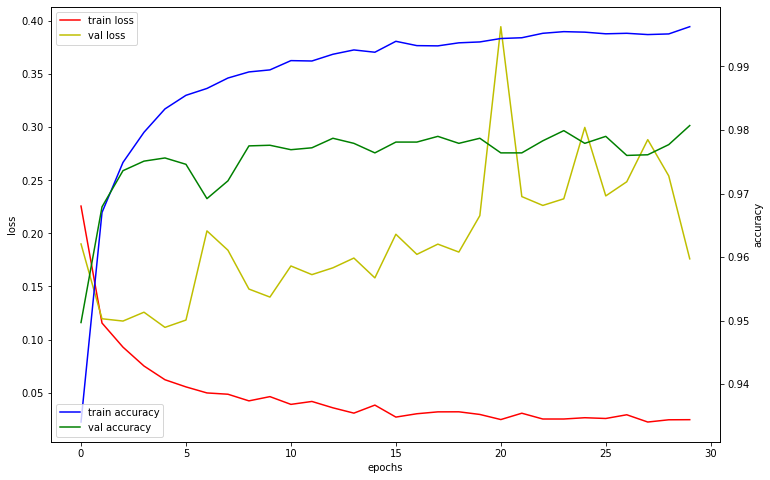

In [91]:
#5. 모델 학습과정을 표시하고 평가
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'r', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'y', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc=2)
acc_ax.legend(loc=3)

In [92]:
#모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
#loss and accuracy
loss_and_metrics[0], loss_and_metrics[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.1771 - accuracy: 0.9804


(0.17712348699569702, 0.980400025844574)